# Works analysis and plot with concepts 1

## Import the library

In [1]:
# Import the full library
from openalex_analysis.plot import InstitutionsPlot, WorksPlot

# If you only need the analysis methods, you can import them without the plot ones with:
from openalex_analysis.analysis import InstitutionsAnalysis, WorksAnalysis

## Basic case

### Works of a concept

In this example, we will analyse the works of sustainability and their references

#### Get the works

In [2]:
concept_sustainability_id = 'C66204764'

wplt = WorksPlot(concept_sustainability_id)

#### The works array

In [3]:
wplt.entities_df.head(3)

id  \
0  https://openalex.org/W2198847224   
1  https://openalex.org/W1999167944   
2  https://openalex.org/W2126975094   

                                             doi  \
0  https://doi.org/10.1016/s1352-0237(01)00307-0   
1        https://doi.org/10.1126/science.1259855   
2                                           None   

                                               title  \
0                           Human Development Report   
1  Planetary boundaries: Guiding human developmen...   
2  Climate change 2007 : impacts, adaptation and ...   

                                        display_name  publication_year  \
0                           Human Development Report              2001   
1  Planetary boundaries: Guiding human developmen...              2015   
2  Climate change 2007 : impacts, adaptation and ...              2007   

  publication_date                                                ids  \
0       2001-05-01  {'doi': 'https://doi.org/10.1016/s1352-0237(01...   
1       2015-02-13  {'doi': 'https://doi.org/10.1126/science.12598...   
2       2007-01-01  {'doi': None, 'mag': '2126975094', 'openalex':...   

  language                                   primary_location     type  ...  \
0       en  {'is_accepted': False, 'is_oa': False, 'is_pub...  article  ...   
1       en  {'is_accepted': True, 'is_oa': True, 'is_publi...  article  ...   
2       en  {'is_accepted': False, 'is_oa': False, 'is_pub...     book  ...   

  referenced_works_count                                   referenced_works  \
0                      0                                                 []   
1                    163  [https://openalex.org/W1007704209, https://ope...   
2                      1                 [https://openalex.org/W1905429483]   

                                       related_works  \
0  [https://openalex.org/W4392167019, https://ope...   
1  [https://openalex.org/W4235755527, https://ope...   
2  [https://openalex.org/W617039848, https://open...   

                                    cited_by_api_url  \
0  https://api.openalex.org/works?filter=cites:W2...   
1  https://api.openalex.org/works?filter=cites:W1...   
2  https://api.openalex.org/works?filter=cites:W2...   

                                      counts_by_year  \
0  [{'cited_by_count': 14, 'year': 2024}, {'cited...   
1  [{'cited_by_count': 891, 'year': 2024}, {'cite...   
2  [{'cited_by_count': 44, 'year': 2024}, {'cited...   

                 updated_date created_date  \
0  2024-09-06T14:44:04.425232   2016-06-24   
1  2024-09-06T06:00:48.170112   2016-06-24   
2  2024-09-14T10:43:11.583624   2016-06-24   

                                            abstract institution_assertions  \
0  In 2013, UN-Habitat released the State of The ...                   None   
1  Crossing the boundaries in global sustainabili...                   None   
2  Foreword Preface Introduction Summary for poli...                     []   

  is_authors_truncated  
0                 None  
1                 None  
2                 None  

[3 rows x 51 columns]

#### Compute the most used references

In [4]:
wplt.create_element_used_count_array('reference')

#### The reference count array

In [5]:
wplt.element_count_df.head(3)

C66204764 Sustainability
element                                                   
https://openalex.org/W4285719527                      1495
https://openalex.org/W49479346                         421
https://openalex.org/W2026816730                       296

## Advanced cases

### Compare the works of a concept and of 2 institutions per year

#### Analysis

In this example, we will compare the works of concept (Sustainability) and the works of 2 institutions (SRC - Stockholm Resilience Centre and UTT - University of Technology of Troyes) year by year.  
The analysis will focus on the concept used by the works but it also work with the references used as in the previous example.

In [6]:
concept_sustainability_id = 'C66204764'
institution_src_id = 'I138595864'
institution_utt_id = 'I140494188'

# count per year from 2015 to 2023
count_years = list(range(2015, 2024))

# The filter needs to have the format from the OpenAlex API
sustainability_concept_filter = {"concepts": {"id": concept_sustainability_id}}

# Create a list of dictionary with each dictionary representing an institution
# The dictionary keys can be any parameter of the WorksConceptsAnalysis constructor
# In our example, we add an extra filter to get only the works about sustainability of each institution
entities_to_compare = [
    {'entity_from_id': institution_src_id, 'extra_filters': sustainability_concept_filter,},
    {'entity_from_id': institution_utt_id, 'extra_filters': sustainability_concept_filter,}
]

# We create instance with the concept of sustainability. In the analysis, the main entity is
# the entity given to the constructor if given, or the first entity in the list given to the
# create_element_used_count_array() function
wplt = WorksPlot(concept_sustainability_id)

wplt.create_element_used_count_array('concept', entities_to_compare, count_years = count_years)

# We sort the entities in the statistics array by the most used. We can also sort them again later
# with sort_count_array()
wplt.add_statistics_to_element_count_array(sort_by = 'sum_all_entities')

#wplt.element_count_df.to_csv("array.csv")
wplt.element_count_df.head(20)

C66204764 Sustainability  \
element                        year                             
https://openalex.org/C18903297 2015                       441   
                               2016                       495   
                               2017                       531   
                               2018                       579   
                               2019                       661   
                               2020                       791   
                               2021                       874   
                               2022                       895   
                               2023                       954   
https://openalex.org/C66204764 2015                       441   
                               2016                       495   
                               2017                       531   
                               2018                       579   
                               2019                       661   
                               2020                       791   
                               2021                       874   
                               2022                       895   
                               2023                       954   
https://openalex.org/C86803240 2015                       441   
                               2016                       495   

                                     I138595864 Stockholm Resilience Centre  \
element                        year                                           
https://openalex.org/C18903297 2015                                      21   
                               2016                                      31   
                               2017                                      29   
                               2018                                      45   
                               2019                                      60   
                               2020                                      57   
                               2021                                      68   
                               2022                                      59   
                               2023                                      58   
https://openalex.org/C66204764 2015                                      21   
                               2016                                      31   
                               2017                                      29   
                               2018                                      45   
                               2019                                      60   
                               2020                                      57   
                               2021                                      68   
                               2022                                      59   
                               2023                                      58   
https://openalex.org/C86803240 2015                                      21   
                               2016                                      31   

                                     I140494188 Université de Technologie de Troyes  \
element                        year                                                   
https://openalex.org/C18903297 2015                                               3   
                               2016                                               0   
                               2017                                               1   
                               2018                                               1   
                               2019                                               2   
                               2020                                               2   
                               2021                                               9   
                               2022                                               2 

#### Plot

As we keep only the 10k most cited articles in each dataset, the selected articles for sustainability contains only 2% of them (~500k in total). As the recent articles are usually less cited than the older ones, we have less articles in the recent years.

The default plot plot the usage of the first concept in the dataframe

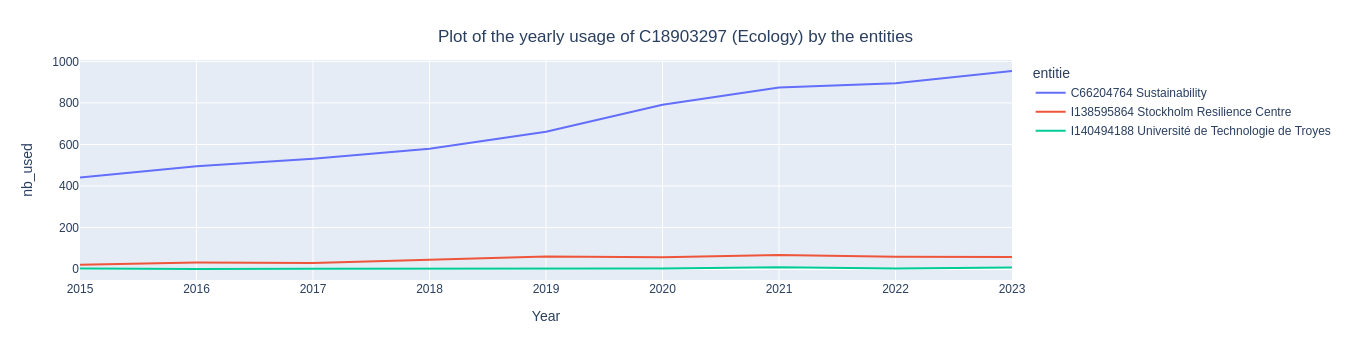

In [7]:
wplt.get_figure_time_series_element_used_by_entities()#.write_image("default_yearly_plot.pdf", width = 1000)

We can plot sum of usage by all and by SRC of the concept "Social sustainability" ('https://openalex.org/C52407799')

In [8]:
wplt.get_figure_time_series_element_used_by_entities(element = 'https://openalex.org/C52407799', y_datas = ['sum_all_entities', 'I138595864 Stockholm Resilience Centre'])#.write_image("sum_yearly_plot.pdf", width = 1000)